In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [2]:
# # from path to big_array.npz
# path = '/media/output/data-pickle'
# data = sorted(os.listdir(path))
# data = [os.path.join(path, x) for x in data]
# arrays = [np.round(np.load(t)).astype(np.int32) for t in tqdm(data)]
# big_array = np.array(arrays)
# np.save(open('big_array.npz', 'wb'), big_array)
# big_array.shape

In [3]:
data = np.load('big_array.npz')

In [4]:
data.shape

(11049, 2000, 4)

In [5]:
# # convert pids to IDs
# pids = sorted(set(data[:, :, 0].flatten()))
# x = data[:, :, 0]
# xflat = x.flatten()
# y = [pids.index(z) for z in tqdm(xflat)]
# data[:, :, 0] = np.array(y).reshape(data.shape[0], data.shape[1])
# np.save(open('big_array.npz', 'wb'), data)

(array([5425539.,       0.,       0., 5643137.,       0.,       0.,
        5622637.,       0.,       0., 5406687.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

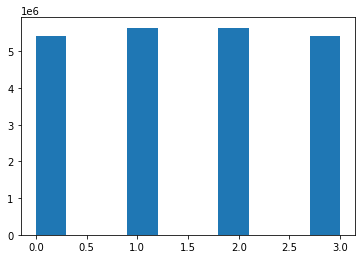

In [6]:
plt.hist(data[:, :, 0].flatten())

In [7]:
steps_env = np.max(data[:, :, 3]) * 4
steps_sampled = data.shape[0] * data.shape[1]
steps_env / steps_sampled

0.5165640329441579

In [8]:
steps_sampled
22098000
2**32, 100000000

(4294967296, 100000000)

In [36]:
idx = [t[0] * 100000000 + t[1] for t in tqdm(data[:, :, [0, 3]].reshape(-1, 2)[:10])]

  0%|          | 0/10 [00:00<?, ?it/s]

[(3, 38708),
 (2, 28109),
 (1, 48873),
 (2, 46939),
 (2, 47044),
 (3, 34422),
 (2, 34041),
 (2, 35213),
 (2, 30877),
 (1, 38063)]

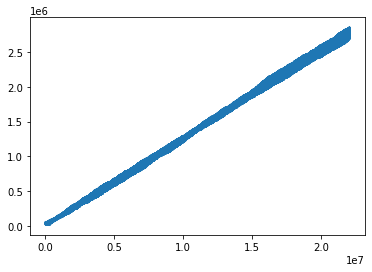

In [25]:
plt.plot(data[:, :, 3].flatten())

In [9]:
data

array([[[      3,     968,      28,   38708],
        [      2,     703,      29,   28109],
        [      1,    1222,      33,   48873],
        ...,
        [      2,    1235,       5,   49365],
        [      0,    1273,      31,   50911],
        [      2,    1174,       4,   46924]],

       [[      2,    1164,       2,   46522],
        [      2,     913,      39,   36519],
        [      3,     742,       7,   29647],
        ...,
        [      1,    1126,      32,   45032],
        [      1,    1033,      20,   41300],
        [      2,     860,      12,   34372]],

       [[      0,    1056,      18,   42218],
        [      0,    1491,      11,   59611],
        [      1,    1177,       1,   47041],
        ...,
        [      0,    1299,      24,   51944],
        [      3,    1020,      20,   40780],
        [      1,    1297,      22,   51862]],

       ...,

       [[      3,   67240,      33, 2689593],
        [      2,   69979,      39, 2799159],
        [      1,   70

In [10]:
# plt.plot(data[data[:, :, 0] == 0][:, 3])
# # plt.yscale('log')
# # plt.xscale('log')

In [11]:
from collections import Counter

In [35]:
data[(data[:, :, 0] == pid)].shape

(5425539, 4)

In [36]:
pid = 1
data_pid = data[data[:, :, 0] == pid][:, 3]

In [37]:
data_pid

array([  48873,   38063,   53903, ..., 2845972, 2851720, 2836798],
      dtype=int32)

(array([582640., 566991., 563331., 563630., 567262., 565608., 566460.,
        565680., 562542., 538993.]),
 array([  33321. ,  315364.7,  597408.4,  879452.1, 1161495.8, 1443539.5,
        1725583.2, 2007626.9, 2289670.6, 2571714.3, 2853758. ]),
 <BarContainer object of 10 artists>)

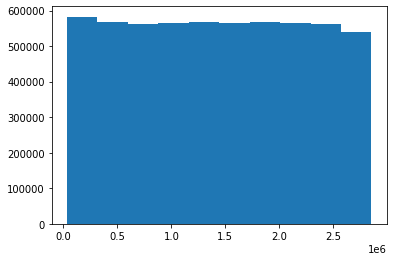

In [38]:
plt.hist(data_pid)

In [39]:
cnt = Counter(data_pid)

In [40]:
most_common = cnt.most_common()

In [41]:
step_id, repetitions = zip(*most_common)

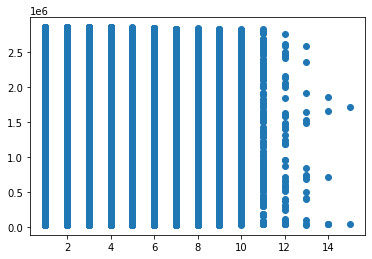

In [47]:
plt.scatter(repetitions, step_id)

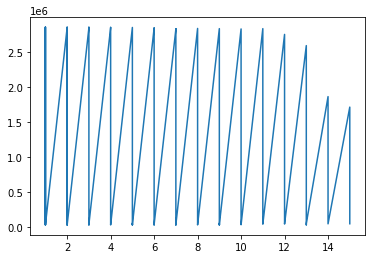

In [48]:
plt.plot(repetitions, step_id)

In [43]:
np.array(repetitions) == max(repetitions)

array([ True,  True, False, ..., False, False, False])

In [44]:
len(repetitions)

2422928

(array([7.65590e+05, 7.50480e+05, 4.95959e+05, 2.50667e+05, 1.03696e+05,
        3.77310e+04, 1.24980e+04, 4.16700e+03, 1.40900e+03, 4.79000e+02,
        1.76000e+02, 5.10000e+01, 1.70000e+01, 6.00000e+00, 2.00000e+00]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        ]),
 <BarContainer object of 15 artists>)

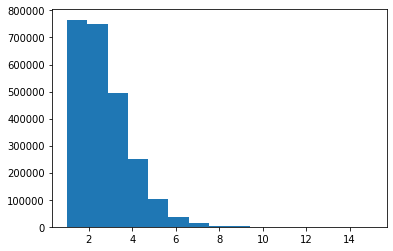

In [50]:
plt.hist(repetitions, bins=max(repetitions))

In [ ]:
buffer = np.array()